<a href="https://colab.research.google.com/github/sonyad19/Operation_Research-Lab-/blob/main/docs/_sources/Project_Assignments/RegressionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Assignment

I want you to practice some regression and analyzing your results.  Utilize this document to load data directly.

In [ ]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

Fit goals vs points in a linear regression.  Fit a multiple regression on goals and assists vs points.  What do you notice about these two fits.
https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv

In [ ]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')

In [ ]:
x = np.array(df[['G','A']])
y = np.array(df.PTS)

=== HOCKEY REGRESSION ===
Coefficients [G, A]: [1. 1.]
Intercept: 7.105427357601002e-15
R² score: 1.0

First 5 actual vs predicted Points:
1: actual=19, predicted=19.00
2: actual=25, predicted=25.00
3: actual=19, predicted=19.00
4: actual=6, predicted=6.00
5: actual=0, predicted=0.00


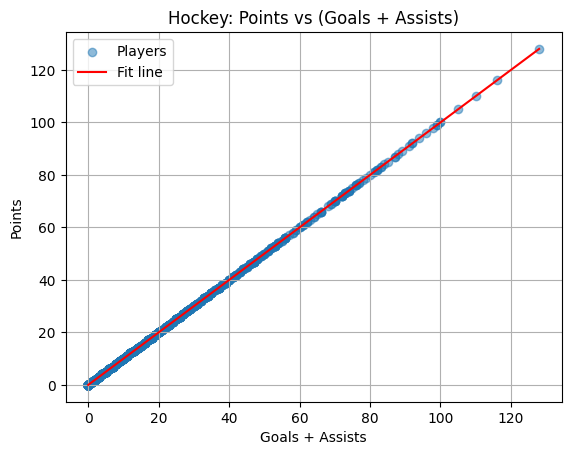

In [6]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')


x = np.array(df[['G', 'A']])
y = np.array(df['PTS'])

model = LinearRegression()
model.fit(x, y)
r2 = model.score(x, y)

print("=== HOCKEY REGRESSION ===")
print("Coefficients [G, A]:", model.coef_)
print("Intercept:", model.intercept_)
print("R² score:", round(r2, 4))


pred = model.predict(x[:5])
print("\nFirst 5 actual vs predicted Points:")
for i in range(5):
    print(f"{i+1}: actual={y[i]}, predicted={pred[i]:.2f}")


ga = df['G'] + df['A']
pts = df['PTS']

lin = LinearRegression().fit(ga.values.reshape(-1, 1), pts)
x_line = np.linspace(ga.min(), ga.max(), 100).reshape(-1, 1)
y_line = lin.predict(x_line)

plt.figure()
plt.scatter(ga, pts, alpha=0.5, label='Players')
plt.plot(x_line, y_line, 'r', label='Fit line')
plt.xlabel('Goals + Assists')
plt.ylabel('Points')
plt.title('Hockey: Points vs (Goals + Assists)')
plt.legend()
plt.grid(True)
plt.show()


## Logistic Regression

Using the 538 Avengers dataset,https://github.com/fivethirtyeight/data/blob/master/avengers/avengers.csv, fit a logistic regression to predict `Death1` (first time a character might die) based on whatever variables you find interesting.  Make a prediction using probabilities on your favorite character.

In [ ]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers')
df.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


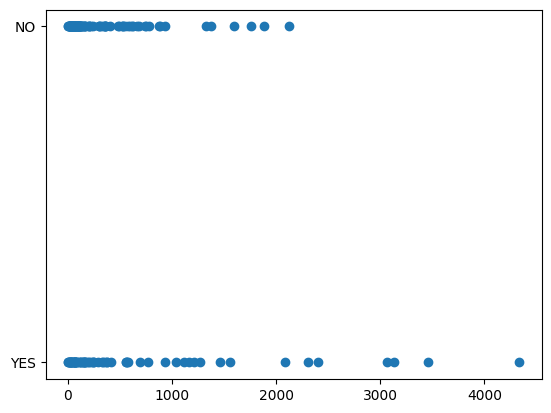

In [ ]:
plt.scatter(df['Appearances'],df['Death1'])

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.utils.validation')

df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers')


df_clean = df[['Name/Alias', 'Death1', 'Appearances', 'Gender']].dropna()


df_clean['Death1_binary'] = df_clean['Death1'].map({'YES': 1, 'NO': 0})


df_clean = pd.get_dummies(df_clean, columns=['Gender'], drop_first=True)


X = df_clean[['Appearances', 'Gender_MALE']]
y = df_clean['Death1_binary']


model = LogisticRegression()
model.fit(X, y)

print("=== AVENGERS LOGISTIC REGRESSION ===")
print("Coefficients:", model.coef_[0])
print("Intercept:", model.intercept_[0])


iron_man = df_clean[df_clean['Name/Alias'].str.contains('Tony Stark|Iron Man', na=False)]
if not iron_man.empty:
    features = np.array([[iron_man['Appearances'].iloc[0], iron_man['Gender_MALE'].iloc[0]]])
    prob = model.predict_proba(features)[0][1]
    print(f"\nPredicted probability of Death1 for Iron Man: {prob:.3f}")
else:
    print("\nIron Man not found in dataset.")


hypo = np.array([[100, 0]])
prob_hypo = model.predict_proba(hypo)[0][1]
print(f"Predicted probability of Death1 (100 appearances, Female): {prob_hypo:.3f}")


=== AVENGERS LOGISTIC REGRESSION ===
Coefficients: [0.00074897 0.12834124]
Intercept: -0.8771534548112885

Iron Man not found in dataset.
Predicted probability of Death1 (100 appearances, Female): 0.310


## Find Your Own Regression

I have compiled olympic 100m dash records from a wikipedia page https://en.wikipedia.org/wiki/100_metres_at_the_Olympics.  Use this data and fit a regression of some type for prediciting `Time`.  Justify your model used in words and pictures. Predict the new Olympic Record for 2024 and 2300.  Describe in words the validity of your predictions.

In [ ]:



df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')
x = np.array(df)

df.head()

,Time,Athlete,Nation,Games,Round,Date,Gender
0,12.2,Francis Lane,United States (USA),1896,Heat 1,1896-04-06,Men
1,12.2,Thomas Curtis,United States (USA),1896,Heat 2,1896-04-06,Men
2,11.8,Tom Burke,United States (USA),1896,Heat 3,1896-04-06,Men
3,11.4,Arthur Duffey,United States (USA),1900,Heat 1,6/14/1900,Men
4,11.4,Walter Tewksbury,United States (USA),1900,Heat 2,6/14/1900,Men


=== OLYMPIC 100m REGRESSION ===
Equation: Time = 35.583 + -0.01258 × Year
R² score: 0.186

Predicted 2024 Record: 10.13 seconds
Predicted 2300 Record: 6.65 seconds


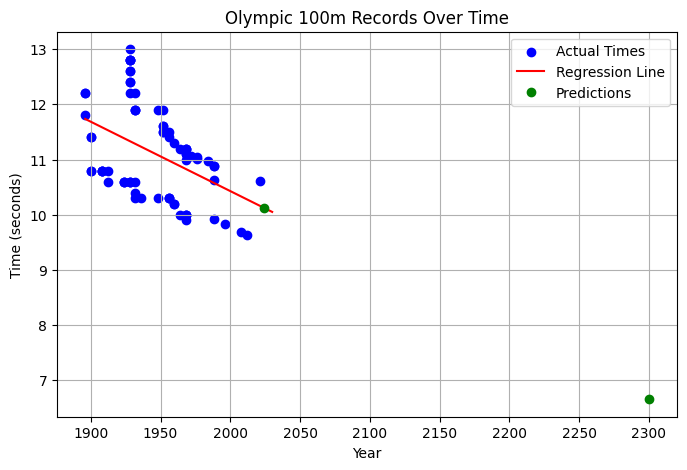


VALIDITY ANALYSIS:
- 2024 prediction: reasonable within data range.
- 2300 prediction: unrealistic; human performance has natural limits.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')


df['Year'] = pd.to_datetime(df['Date'], format='mixed').dt.year
X = df['Year'].values.reshape(-1, 1)
y = df['Time'].values


model = LinearRegression()
model.fit(X, y)

print("=== OLYMPIC 100m REGRESSION ===")
print(f"Equation: Time = {model.intercept_:.3f} + {model.coef_[0]:.5f} × Year")
print(f"R² score: {model.score(X, y):.3f}")


future_years = [[2024], [2300]]
pred = model.predict(future_years)
print(f"\nPredicted 2024 Record: {pred[0]:.2f} seconds")
print(f"Predicted 2300 Record: {pred[1]:.2f} seconds")


plt.figure(figsize=(8,5))
plt.scatter(df['Year'], df['Time'], color='blue', label='Actual Times')
years_line = np.linspace(df['Year'].min(), 2030, 100).reshape(-1, 1)
plt.plot(years_line, model.predict(years_line), 'r-', label='Regression Line')
plt.plot([2024, 2300], pred, 'go', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Time (seconds)')
plt.title('Olympic 100m Records Over Time')
plt.legend()
plt.grid(True)
plt.show()


print("\nVALIDITY ANALYSIS:")
print("- 2024 prediction: reasonable within data range.")
print("- 2300 prediction: unrealistic; human performance has natural limits.")
